In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, f1_score

In [2]:
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
import datetime
import keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0], [
    tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2000)])

In [5]:
INIT_LR = 1e-3
EPOCHS = 50
BS = 128
optimizer = Adam(lr=INIT_LR)
num_classes = 10
modelOutput = 'data/model_nn_1.h5'

In [6]:
class Net:
    @staticmethod
    def build_model(width, height, depth, classes=num_classes):
        model = Sequential()
        inputShape = (height, width, depth)

        model.add(Conv2D(32, (5, 5), padding='same', input_shape=inputShape))
        model.add(Conv2D(32, (5, 5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        model.add(Conv2D(64, (5, 5), padding='same', input_shape=inputShape))
        model.add(Conv2D(64, (5, 5), padding='same', input_shape=inputShape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(0.2))

        model.add(Dense(classes))
        model.add(Activation('softmax'))

        return model

In [7]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [8]:
X_ = train.drop('label',axis=1)
y_ = train['label']

X_ = X_.values.reshape(-1, 28, 28, 1)
X_ = X_ / 255

y_ = to_categorical(y_)

In [9]:
X_train, X_test, y_train, y_test = tts(X_, y_, test_size=0.3, random_state=228)

In [10]:
model = Net.build_model(28, 28, 1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [11]:
net = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=BS, epochs=EPOCHS, verbose=1)

Epoch 1/50
230/230 [==============================] - 3s 11ms/step - loss: 0.2170 - accuracy: 0.9302 - val_loss: 0.0596 - val_accuracy: 0.9811
Epoch 2/50
230/230 [==============================] - 2s 9ms/step - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.0401 - val_accuracy: 0.9864
Epoch 3/50
230/230 [==============================] - 2s 10ms/step - loss: 0.0545 - accuracy: 0.9827 - val_loss: 0.0342 - val_accuracy: 0.9892
Epoch 4/50
230/230 [==============================] - 2s 10ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0370 - val_accuracy: 0.9890
Epoch 5/50
230/230 [==============================] - 2s 10ms/step - loss: 0.0390 - accuracy: 0.9880 - val_loss: 0.0353 - val_accuracy: 0.9889
Epoch 6/50
230/230 [==============================] - 2s 10ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 7/50
230/230 [==============================] - 2s 10ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0304 - val_accuracy: 0.9907


In [12]:
pred = model.predict(X_test)
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1), target_names=[str(x) for x in range(0, 10)]))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1202
           1       0.99      1.00      0.99      1451
           2       0.98      1.00      0.99      1271
           3       0.99      0.99      0.99      1353
           4       0.99      0.99      0.99      1190
           5       0.99      0.99      0.99      1131
           6       0.99      1.00      0.99      1239
           7       0.99      0.98      0.99      1331
           8       1.00      0.98      0.99      1202
           9       0.98      0.99      0.99      1230

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



In [13]:
model.save(modelOutput, save_format='h5')

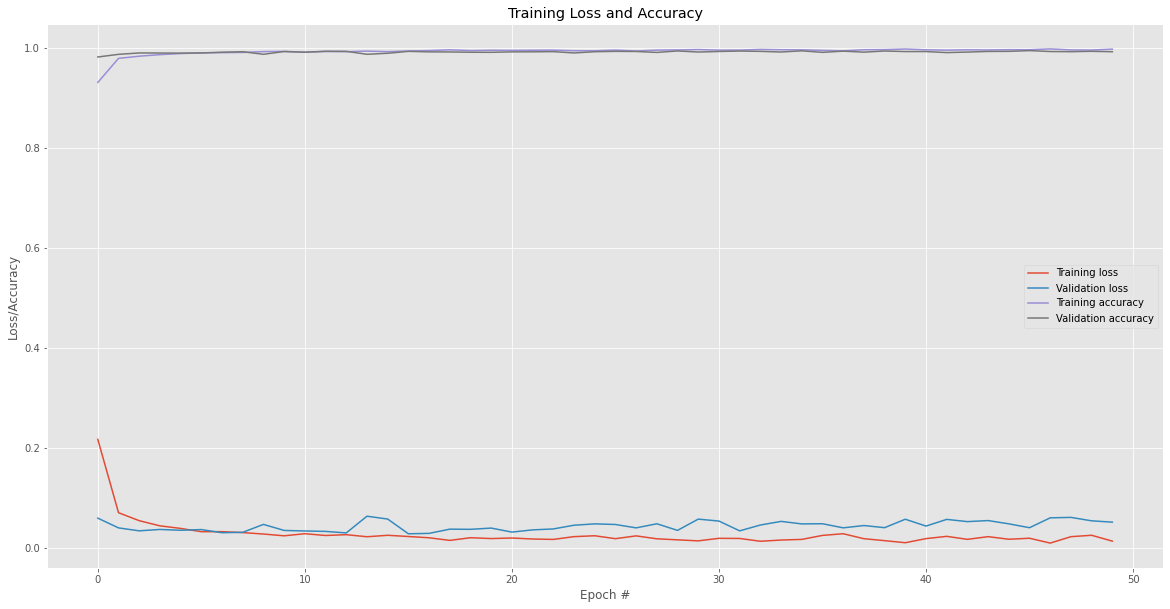

In [14]:
plt.style.use("ggplot")
plt.figure(figsize=(20, 10))
N = EPOCHS
plt.plot(np.arange(0, N), net.history["loss"], label=r"Training loss")
plt.plot(np.arange(0, N), net.history["val_loss"], label=r"Validation loss")
plt.plot(np.arange(0, N), net.history["accuracy"], label=r"Training accuracy")
plt.plot(np.arange(0, N), net.history["val_accuracy"], label=r"Validation accuracy")
plt.title(r"Training Loss and Accuracy")
plt.xlabel(r"Epoch #")
plt.ylabel(r"Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig('data/model_plot_1.png')

In [15]:
test = test.values.reshape(-1, 28, 28, 1) / 255
y_pred = model.predict(test, batch_size = BS)

y_pred = np.argmax(y_pred, axis = 1)
y_pred = pd.Series(y_pred, name="label")
y_pred

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: label, Length: 28000, dtype: int64

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)
submission.to_csv("submission_nn.csv", index=False)

In [16]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)
submission.to_csv("submission_nn.csv", index=False)